<a href="https://colab.research.google.com/github/ronnyboi/Data_Analytics/blob/main/Program%205%20-%20Correlation%3A%20Linear%20and%20Chi%20square%20test/Ron_Program5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Correlation: Linear and Chi square test**


1.   Linear: Find covariance and Pearson's correlation between all pairs of numerical attributes of any dataset of your choice
2.   Find the important features: correlation between target column and other columns 
3. Chi square test: Take an example of your choice, define H0 and Ha. Implement Chi square test and interpret the test result with alpha = 5%


The dataset is taken from https://www.kaggle.com/nyjoey/youtube-stats?select=CAvideos.csv

## **Trending Youtube Video Statistics**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
yt_df = pd.read_csv('CAvideos.csv',  encoding='utf-8')
yt_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...


In [ ]:
yt_df.describe() 

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


To find the covariance

In [ ]:
features = yt_df[['views', 'likes', 'dislikes', 'comment_count']]
da=features.head(10)
da

,views,likes,dislikes,comment_count
0,17158579,787425,43420,125882
1,1014651,127794,1688,13030
2,3191434,146035,5339,8181
3,2095828,132239,1989,17518
4,33523622,1634130,21082,85067
5,1309699,103755,4613,12143
6,2987945,187464,9850,26629
7,748374,57534,2967,15959
8,4477587,292837,4123,36391
9,505161,4135,976,1484


In [ ]:
covariance = da.cov(min_periods=None)
covariance

,views,likes,dislikes,comment_count
views,1.129213e+14,5.326932e+12,9.863330e+10,3.405686e+11
likes,5.326932e+12,2.526820e+11,4.471769e+09,1.580614e+10
dislikes,9.863330e+10,4.471769e+09,1.764013e+08,5.099234e+08
comment_count,3.405686e+11,1.580614e+10,5.099234e+08,1.594242e+09


To Find the Pearson's Corelation

In [ ]:
pearsoncorr = yt_df.corr(method='pearson')
pearsoncorr

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000


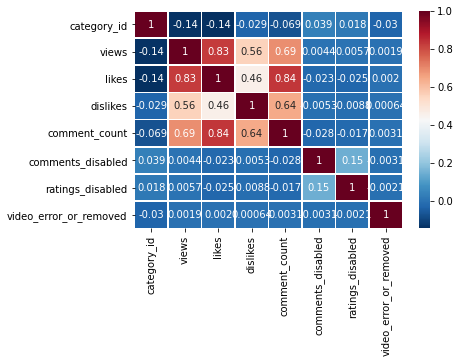

In [ ]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Correlation Matrix

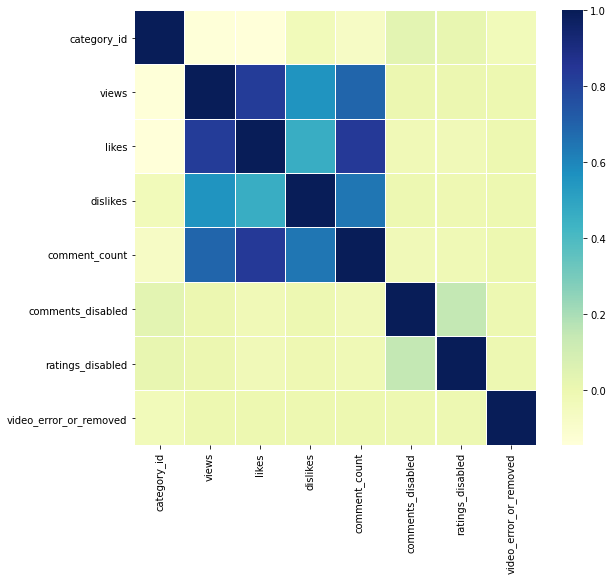

In [ ]:
corrmat = yt_df.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sb.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [ ]:
viewsList = da['views']
likesList  = da['likes']
dislikesList  = da['dislikes']
commentList = da['comment_count']

In [ ]:
corr = stats.pearsonr(viewsList,likesList)
print('Correlation between number of views and number of likes:\n',corr)

Correlation between number of views and number of likes:
 (0.9972455166850847, 2.510165797532818e-10)


In [ ]:
corr = stats.pearsonr(viewsList,dislikesList)
print('Correlation between number of views and number of dislikes:\n',corr)

Correlation between number of views and number of dislikes:
 (0.6988511529369122, 0.02454128882251851)


In [ ]:
corr = stats.pearsonr(likesList,commentList)
print('Correlation between number of likes and number of comments:\n',corr)

Correlation between number of likes and number of comments:
 (0.7875200209902489, 0.006839054052024207)


In [ ]:
chi_square_test = stats.chisquare(viewsList, likesList, axis=0)
print('chi-square test of given dataset is:\n ',chi_square_test)

chi-square test of given dataset is:
  Power_divergenceResult(statistic=1246158237.9444573, pvalue=0.0)


To find the observed values

In [ ]:
obv=da.values
print('Observed values are: \n', obv)

Observed values are: 
 [[17158579   787425    43420   125882]
 [ 1014651   127794     1688    13030]
 [ 3191434   146035     5339     8181]
 [ 2095828   132239     1989    17518]
 [33523622  1634130    21082    85067]
 [ 1309699   103755     4613    12143]
 [ 2987945   187464     9850    26629]
 [  748374    57534     2967    15959]
 [ 4477587   292837     4123    36391]
 [  505161     4135      976     1484]]


To find the degree of freedom

In [ ]:
no_of_rows=len(da.iloc[9]) 
no_of_columns=len(da.iloc[3]) 
ddof=(no_of_rows-1)*(no_of_columns-1) 
print("Degree of Freedom: -",ddof)
alpha = 0.05 # 5%

Degree of Freedom: - 9


To find the expected value

In [ ]:
exv = stats.chi2_contingency(da)
print('Expected values are:')
exv

Expected values are:


(363414.1941129145,
 0.0,
 27,
 array([[1.71161985e+07, 8.87150555e+05, 2.45319931e+04, 8.74249976e+04],
        [1.09334237e+06, 5.66690840e+04, 1.56704583e+03, 5.58450255e+03],
        [3.16617300e+06, 1.64106074e+05, 4.53795477e+03, 1.61719711e+04],
        [2.12361429e+06, 1.10069160e+05, 3.04369520e+03, 1.08468580e+04],
        [3.33190026e+07, 1.72695892e+06, 4.77548531e+04, 1.70184620e+05],
        [1.35133010e+06, 7.00408591e+04, 1.93680979e+03, 6.90223537e+03],
        [3.03474379e+06, 1.57293960e+05, 4.34958230e+03, 1.55006656e+04],
        [7.79342200e+05, 4.03941253e+04, 1.11700139e+03, 3.98067305e+03],
        [4.54560191e+06, 2.35603324e+05, 6.51503751e+03, 2.32177278e+04],
        [4.83531289e+05, 2.50619349e+04, 6.93026918e+02, 2.46974945e+03]]))

To perform the chi square test

In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(obv, exv)]) 
chi_square_statistic=chi_square[0]+chi_square[1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
print(chi_square_statistic)

[inf inf inf inf]


To find the critical value

In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print(critical_value)

16.918977604620448


In [ ]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value', p_value) # p-value of all 4 columns
print('significance level: ',alpha)
print('Degree of freedom: ',ddof) 

p-value [0. 0. 0. 0.]
significance level:  0.05
Degree of freedom:  9
